In [1]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score , classification_report

In [2]:
#Ignoring future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Loading in the csv as df_bs, where bs stands for brain stroke ;)
df_bs =pd.read_csv(r"brain_stroke.csv")

In [4]:
#Checking for how many patients are in the dataframe and how many 
df_bs.shape 

(4981, 11)

In [5]:
#Printing out the first 5 rows
df_bs.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
#Checking the data type for all 11 columns
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
#Checking for duplicated values.
df_bs.duplicated().sum()

0

In [8]:
#Checking for null values
df_bs.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
#Checking how many patients had a stroke versus not.
df_bs['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [13]:
#Data visualizations
#Setting a variable numerical_data that contains all the numerical data
numerical_data=df_bs[['age','avg_glucose_level','bmi']]
numerical_data

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0
...,...,...,...
4976,41.0,70.15,29.8
4977,40.0,191.15,31.1
4978,45.0,95.02,31.8
4979,40.0,83.94,30.0


In [17]:
#Setting a variable categorical_data that contains all the categorical data
categorical_data=df_bs.select_dtypes(include=['object','int64'])
categorical_data

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Male,0,1,Yes,Private,Rural,never smoked,1
2,Female,0,0,Yes,Private,Urban,smokes,1
3,Female,1,0,Yes,Self-employed,Rural,never smoked,1
4,Male,0,0,Yes,Private,Urban,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,0,0,No,Private,Rural,formerly smoked,0
4977,Male,0,0,Yes,Private,Urban,smokes,0
4978,Female,1,0,Yes,Govt_job,Rural,smokes,0
4979,Male,0,0,Yes,Private,Rural,smokes,0


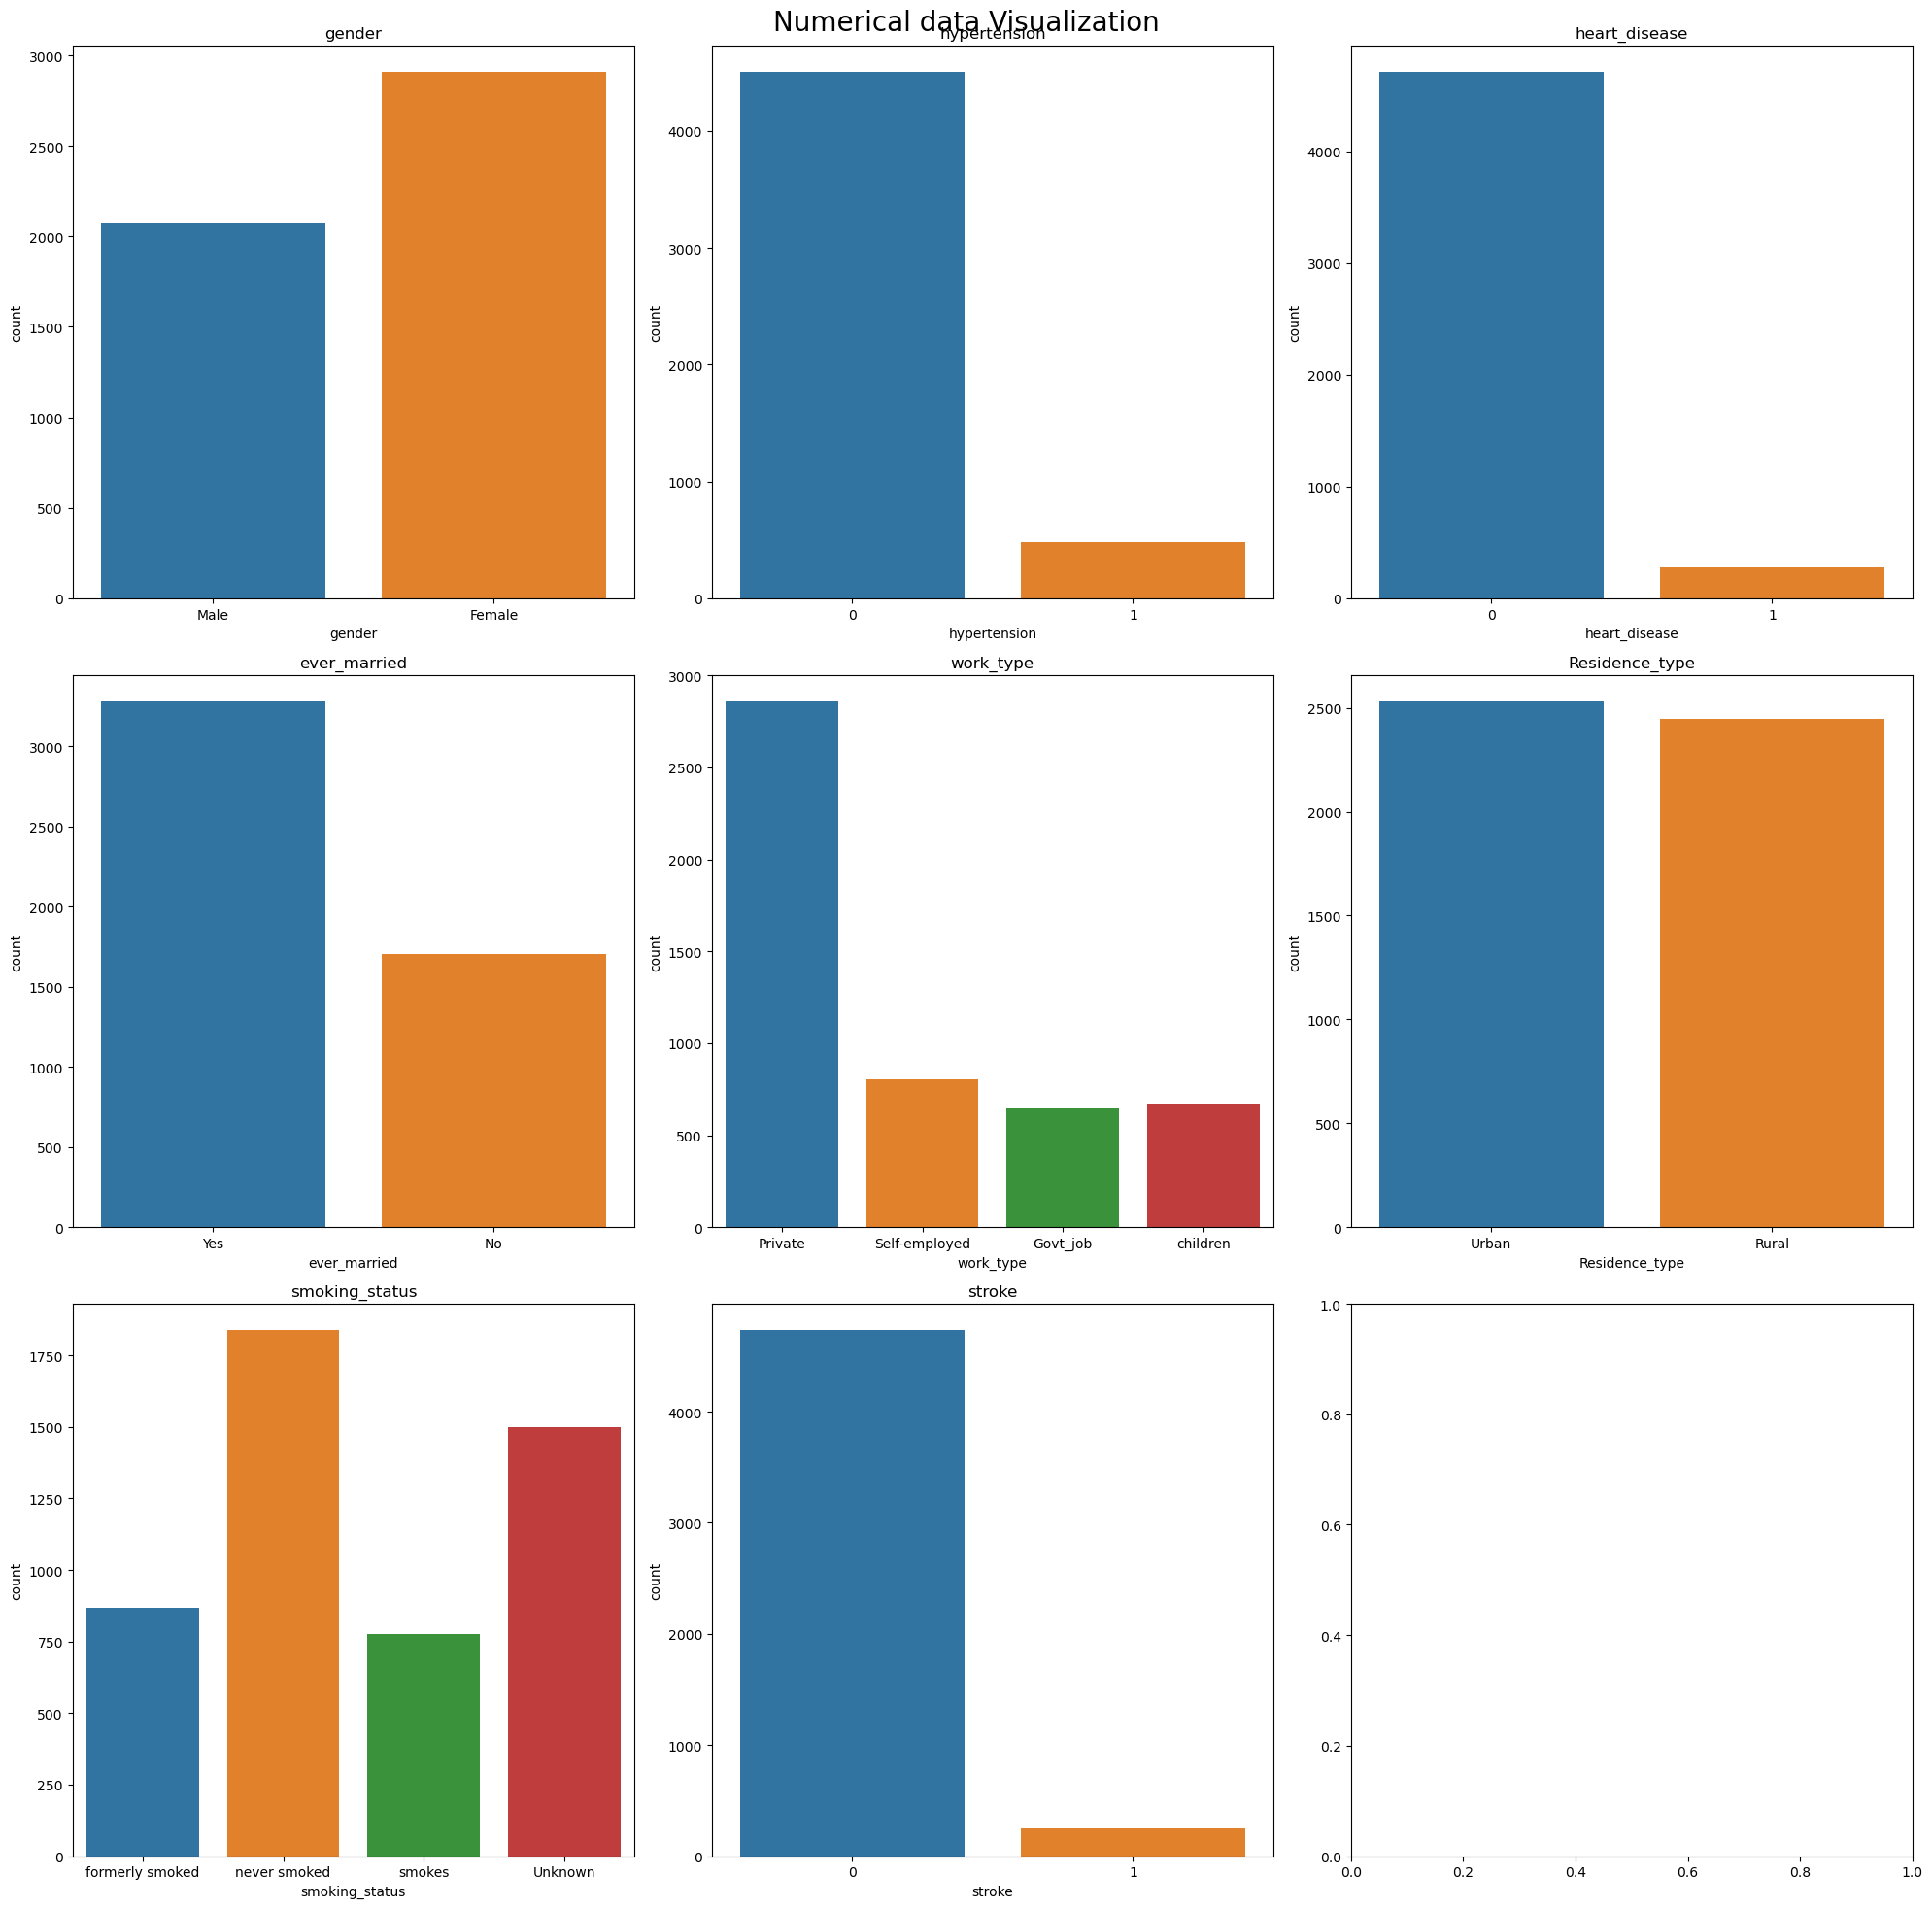

In [23]:
#Basic visualizations of columns by bar-graph
fig,ax=plt.subplots(3,3,figsize=(20,20))
fig.suptitle('Numerical data Visualization',fontsize=20)
for i,col in enumerate(categorical_data.columns):
    axs=ax[i//3,i%3]
    sns.countplot(x=df_bs[col],ax=axs)
    axs.set_title(col)
    plt.tight_layout()
plt.show()

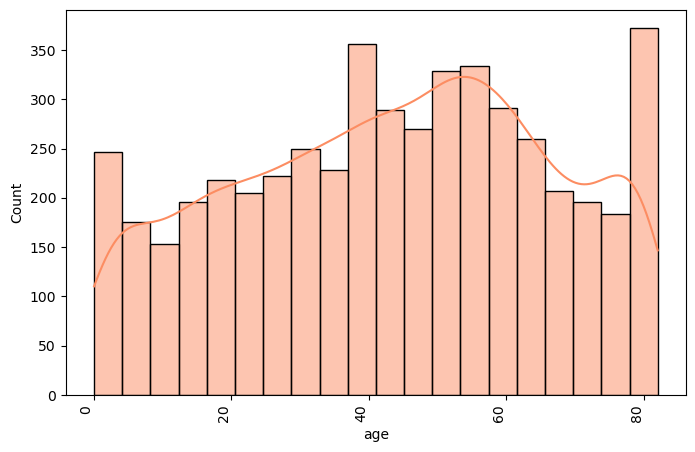

In [48]:
#Looking at the age distribution
plt.figure(figsize=(8, 5))
palette = sns.color_palette("Set2")
sns.histplot(df_bs['age'], kde=True, color=palette[1])
plt.xticks(rotation=90, ha="right")
plt.show()

/var/folders/wx/yxss64053pn1gny__4jzngg80000gp/T/ipykernel_2549/3488107454.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.displot(data=df_bs, x="Residence_type", hue="stroke",bins=20, palette=palette)


([0, 1], [Text(0, 0, 'Urban'), Text(1, 0, 'Rural')])

<Figure size 1200x800 with 0 Axes>

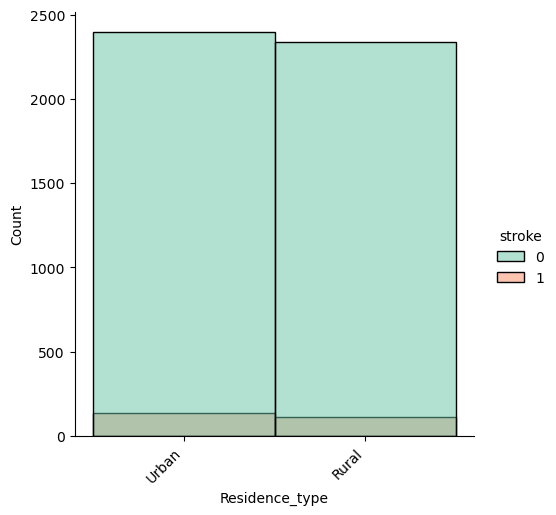

In [50]:
#Looking at residence type and stroke versus no stroke
plt.figure(figsize=(12,8))
palette = sns.color_palette("Set2")
sns.displot(data=df_bs, x="Residence_type", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")